# Read all CSV's

In [1]:

AAPL <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
AMZN <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
FB <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/FB?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
GOOG <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
IBM <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
MSFT <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
NFLX <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/NFLX?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
ORCL <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/ORCL?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
SAP <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/SAP?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')
TSLA <- read.csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1514782800&period2=1546232400&interval=1d&events=history&includeAdjustedClose=true')

# Create new CSV with Close values of all stocks

In [2]:
library(ggplot2)
library(dplyr)


stockDF <- data.frame(AAPL$Close, AAPL$Adj.Close, AMZN$Close, AMZN$Adj.Close, FB$Close, FB$Adj.Close, GOOG$Close, GOOG$Adj.Close, 
                     IBM$Close, IBM$Adj.Close, MSFT$Close, MSFT$Adj.Close, NFLX$Close, NFLX$Adj.Close, ORCL$Close, ORCL$Adj.Close, 
                     SAP$Close, SAP$Adj.Close, TSLA$Close, TSLA$Adj.Close)

head(stockDF)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,AAPL.Close,AAPL.Adj.Close,AMZN.Close,AMZN.Adj.Close,FB.Close,FB.Adj.Close,GOOG.Close,GOOG.Adj.Close,IBM.Close,IBM.Adj.Close,MSFT.Close,MSFT.Adj.Close,NFLX.Close,NFLX.Adj.Close,ORCL.Close,ORCL.Adj.Close,SAP.Close,SAP.Adj.Close,TSLA.Close,TSLA.Adj.Close
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43.0650,41.38024,1189.01,1189.01,181.42,181.42,1065.00,1065.00,154.25,132.0392,85.95,82.19433,201.07,201.07,46.63,44.17343,112.39,107.6534,64.106,64.106
2,43.0575,41.37303,1204.20,1204.20,184.67,184.67,1082.48,1082.48,158.49,135.6686,86.35,82.57684,205.05,205.05,47.71,45.19653,113.31,108.5347,63.450,63.450
3,43.2575,41.56522,1209.59,1209.59,184.33,184.33,1086.40,1086.40,161.70,138.4164,87.11,83.30366,205.63,205.63,48.18,45.64177,115.05,110.2013,62.924,62.924
4,43.7500,42.03845,1229.14,1229.14,186.85,186.85,1102.23,1102.23,162.49,139.0927,88.19,84.33646,209.99,209.99,48.47,45.91651,116.33,111.4274,63.316,63.316
5,43.5875,41.88231,1246.87,1246.87,188.28,188.28,1106.94,1106.94,163.47,139.9315,88.28,84.42252,212.05,212.05,48.98,46.39962,114.80,109.9619,67.282,67.282
6,43.5825,41.87751,1252.70,1252.70,187.87,187.87,1106.26,1106.26,163.83,140.2397,88.22,84.36516,209.31,209.31,49.06,46.65640,114.16,109.3488,66.738,66.738


# Find remainder cash left over after buying all shares

In [3]:

findCash <- function(rowShares,rowCost,totalCash) {
   cash = totalCash - rowSums(rowShares*rowCost)
}

In [28]:
dailyChange <- function(data){
    f <- 5000000 # original mtm 
    percentChange <- data[(data-5000000)/5000000]
    percentChange <- c(0, percentChange)
}

# Find the 5 stocks with the lowest/highest adj close percentage changes

In [29]:

percentChanges = function(index, stockDF, filter, interval = 5){
    #Index is the day to calcuate the percent cahgne for looking back 5 days | should be >=6
    #StockDF is the df of Closing and Adj Closing prices 
    #filter is either "min" or "max"
    if(!require(data.table)){install.packages('data.table')}
    percentChange <- ((stockDF[index-interval,]-stockDF[index,])/stockDF[index-interval,])[,c("AAPL.Adj.Close","AMZN.Adj.Close","FB.Adj.Close","GOOG.Adj.Close","IBM.Adj.Close","MSFT.Adj.Close","NFLX.Adj.Close","ORCL.Adj.Close","SAP.Adj.Close","TSLA.Adj.Close")]
    setnames(percentChange, old=c("AAPL.Adj.Close","AMZN.Adj.Close","FB.Adj.Close","GOOG.Adj.Close","IBM.Adj.Close","MSFT.Adj.Close","NFLX.Adj.Close","ORCL.Adj.Close","SAP.Adj.Close","TSLA.Adj.Close"), new=c("AAPL","AMZN","FB","GOOG","IBM","MSFT","NFLX","ORCL","SAP","TSLA"))
    percentChange
    names <- c()
    for(i in 1:5){
        if (filter == "min"){
            min <- apply(percentChange, 1, "min")
            names <- c(names, colnames(percentChange)[which(percentChange == min)])
            percentChange[percentChange == min] <- 1000000000000
        }
        if (filter == "max"){
            max <- apply(percentChange, 1, "max")
            names <- c(names, colnames(percentChange)[which(percentChange == max)])
            percentChange[percentChange == max] <- -1000000000000
        }
    }
    a<-c(names)
}

# Sell all stocks and liquidate

In [30]:

stockEvaluation <- function(rowShares,rowCost) {
   cash = rowSums(rowShares*rowCost)
}

In [31]:
dividendPayout = function(index, stocks, stockDF){
    #Returns the dollar amount of dividend earned that day
    copyStockDF<-data.frame(stockDF)
    sum <- 0
    
    for (stock in stocks){
        lenS <- length(copyStockDF[,paste(stock,".Close",sep="")]);
        ratio <- (copyStockDF[,paste(stock,".Close",sep="")][1:lenS-1]/copyStockDF[,paste(stock,".Close",sep="")][2:lenS])-(copyStockDF[,paste(stock,".Adj.Close",sep="")][1:lenS-1]/copyStockDF[,paste(stock,".Adj.Close",sep="")][2:lenS])
        ratio[ratio < .000001] <- 0
        ratio <- c(0, ratio)
        div <- ratio*copyStockDF[,paste(stock,".Close",sep="")]

        sum <- sum + div[index]
        
    }
    sum
}

In [32]:
highTechIndexPlot <- function(mnt, stockDF) { #takes in a list of our mnt value and the stockDF
    mnt <- dailyChange(mnt)
    
    # Referenced Columns relative to stockDF
    highTechIndex = (stockDF$AAPL.Close + stockDF$AMZN.Close + stockDF$FB.Close + stockDF$GOOG.Close + stockDF$IBM.Close 
                 + stockDF$MSFT.Close + stockDF$NFLX.Close + stockDF$ORCL.Close + stockDF$SAP.Close + stockDF$TSLA.Close) / nrow(stockDF)

    highTechIndex <- dailyChange(highTechIndex)
    
    data <- data.frame(Days = 1:length(mnt),
                       MTM = mnt,
                       HighTechIndex = highTechIndex)
    
    ggp1 <- ggplot(data, aes(Days)) +
    geom_line(aes(y = MTM), color = "red") +
    geom_line(aes(y = HighTechIndex), color = "blue") + labs(y = "Percent Change", x = "Days", title="MTM VS High Tech Index")
    ggp1
}

[[1]]
[1] 0

$percentChange
  [1]  0.000000000  0.012226827  0.020727441  0.032809742  0.037400744
  [6]  0.038557660  0.042046714  0.053056661  0.061694380  0.065564699
 [11]  0.073315075  0.075018032  0.069174588  0.081115776  0.114814268
 [16]  0.116079584  0.125916402  0.141444742  0.145736814  0.137859881
 [21]  0.138432141  0.118995132  0.106910826  0.062755042  0.094037832
 [26]  0.085709654  0.028615642  0.030575171  0.056955610  0.064831698
 [31]  0.087723074  0.106848344  0.103893317  0.107932188  0.106272086
 [36]  0.107014726  0.127042873  0.148144496  0.133884381  0.126437090
 [41]  0.104013835  0.116100955  0.135862080  0.142989204  0.143937583
 [46]  0.142525669  0.169143086  0.165006964  0.149986755  0.156614957
 [51]  0.156107773  0.149995935  0.127558347  0.134355748  0.127141280
 [56]  0.096508990  0.071323131  0.121287617  0.082462927  0.065177219
 [61]  0.082677295  0.062639202  0.067573207  0.088551943  0.094206395
 [66]  0.073005780  0.074189568  0.104935771  0.0

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (250): y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.d

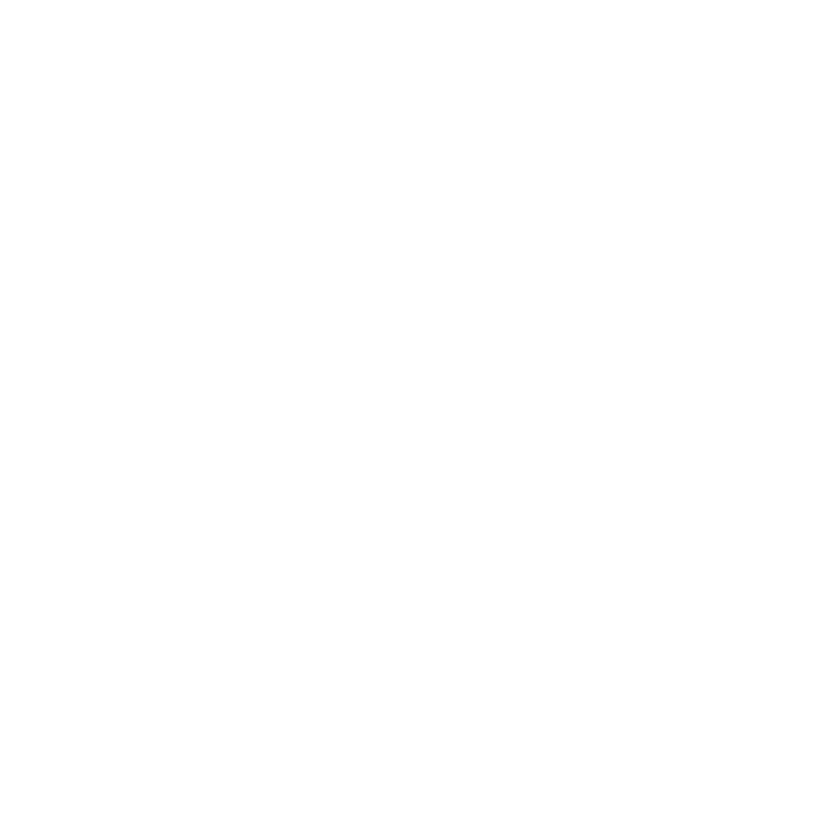

In [46]:
dailyChange <- function(data){
    f <- 5000000 # original mtm 
    percentChange <- transmute(data, percentChange=(data[,1]-5000000)/5000000)
    percentChange <- c(0, percentChange)
}

makePlot <- function(stockShares, incr, csv){
    mtm =stockShares %>% select(MTM)
    
    # because JPD currency csv has more dates than stock dates, only grab the rows with dates that are in original
    csv = csv[ ( csv$Date %in% AAPL$Date ), ]
    
    # grab rows based on the increment and retrieve the Close Values 
    filtered =  csv #filter(csv, row_number() %% incr == 1)
    rates = filtered$Close 
    
    # convert mtm USD to JPY
    mtmJpy = mtm * rates
    mtm <- dailyChange(mtm)
    print(mtm)
    mtmJpy <- dailyChange(mtmJpy)
    print(mtmJpy)
  
    data <- data.frame(Days = 1:length(mtm),
                       MTM = mtm,
                       mtmJpy = mtmJpy)
    
    ggp1 <- ggplot(data, aes(Days)) +
    geom_line(aes(y = MTM), color = "red") +
    geom_line(aes(y = mtmJpy), color = "blue") + labs(y = "Percent Change", x = "Days", title="MTM VS High Tech Index")
    ggp1
}

JPY <- read.csv("conversion.csv")
makePlot(stockShares,5,JPY)

# Analysis: Reinvesting in 5 Stocks Who Lost the Most Every 5 Days

In [34]:
#Reinvestment in 5 Stocks Who Lost the Most Every 5 Days
library(dplyr)
stockShares=setNames(data.frame(matrix(ncol = 12, nrow = 0)), c('MTM', 'Cash','AAPL','AMZN','FB','GOOG','IBM', 'MSFT', 'NFLX', 'ORCL', 'SAP','TSLA'))

MTM = 5000000
to_buy_stocks = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
day =1
#Selling the stocks
    stockShares[nrow(stockShares) + 1,] = c(0)
    stockShares[nrow(stockShares),'MTM'] = MTM
    split = MTM/5
    
    currCash = 0
    
    #Buying the stocks
   for (stock in to_buy_stocks) {
    shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
    #The number of shares we buy of each stock
    stockShares[nrow(stockShares),stock] =shares  
    currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
   } 
    stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)

day = day + 1

while (day<=nrow(stockDF)){
    #calculate dividend
     dividend = dividendPayout(day, to_buy_stocks, stockDF)
    Cash = stockShares[nrow(stockShares),'Cash'] + dividend
    
    MTM = stockEvaluation(stockShares[nrow(stockShares),3:ncol(stockShares)],select(stockDF,!contains("Adj"))[day,]) + Cash
        
    if (day%%5==1){
        to_buy_stocks = percentChanges(day, stockDF, "min")
        stockShares[nrow(stockShares) + 1,] = c(0)
        split = MTM/5
        currCash = 0
        
        #Buying the stocks
       for (stock in to_buy_stocks) {
        shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
        #The number of shares we buy of each stock
        stockShares[nrow(stockShares),stock] =shares  
        currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
       } 
        stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)
        stockShares[nrow(stockShares),'MTM'] = MTM
    }
    else{  
        stockShares[nrow(stockShares) + 1,] <- stockShares[nrow(stockShares),]
        stockShares[nrow(stockShares),'MTM'] = MTM
        stockShares[nrow(stockShares),'Cash'] = Cash
    }
    day = day + 1
}
stockShares
investingIn5Losers<-data.frame(stockShares)

,MTM,Cash,AAPL,AMZN,FB,GOOG,IBM,MSFT,NFLX,ORCL,SAP,TSLA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5000000,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
2,5061134,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
3,5103637,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
4,5164049,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
5,5187004,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
6,5192788,333.5967,0,829,0,0,6339,0,4961,21169,0,15561
7,5210234,333.5967,0,829,0,0,6339,0,4961,21169,0,15561
8,5265283,333.5967,0,829,0,0,6339,0,4961,21169,0,15561
9,5308472,333.5967,0,829,0,0,6339,0,4961,21169,0,15561


## Graphical Analysis

In [35]:
highTechIndexPlot(investingIn5Losers$MTM, stockDF)

makePlot(investingIn5Losers, 5, JPY)

ERROR: Error in data[(data - 5e+06)/5e+06]: only 0's may be mixed with negative subscripts


# Analysis: Reinvesting in 5 Stocks Who Gained the Most Every 5 Days

In [26]:
#Reinvestment in 5 Stocks Who Gained the Most Every 5 Days
stockShares=setNames(data.frame(matrix(ncol = 12, nrow = 0)), c('MTM', 'Cash','AAPL','AMZN','FB','GOOG','IBM', 'MSFT', 'NFLX', 'ORCL', 'SAP','TSLA'))

MTM = 5000000
to_buy_stocks = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
day =1
#Selling the stocks
    stockShares[nrow(stockShares) + 1,] = c(0)
    stockShares[nrow(stockShares),'MTM'] = MTM
    split = MTM/5
    
    currCash = 0
    
    #Buying the stocks
   for (stock in to_buy_stocks) {
    shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
    #The number of shares we buy of each stock
    stockShares[nrow(stockShares),stock] =shares  
    currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
   } 
    stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)

day = day + 1

while (day<=nrow(stockDF)){
    #calculate dividend
     dividend = dividendPayout(day, to_buy_stocks, stockDF)
    Cash = stockShares[nrow(stockShares),'Cash'] + dividend
    
    MTM = stockEvaluation(stockShares[nrow(stockShares),3:ncol(stockShares)],select(stockDF,!contains("Adj"))[day,]) + Cash
        
    if (day%%5==1){
        to_buy_stocks = percentChanges(day, stockDF, "max")
        stockShares[nrow(stockShares) + 1,] = c(0)
        split = MTM/5
        currCash = 0
        
        #Buying the stocks
       for (stock in to_buy_stocks) {
        shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
        #The number of shares we buy of each stock
        stockShares[nrow(stockShares),stock] =shares  
        currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
       } 
        stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)
        stockShares[nrow(stockShares),'MTM'] = MTM
    }
    else{  
        stockShares[nrow(stockShares) + 1,] <- stockShares[nrow(stockShares),]
        stockShares[nrow(stockShares),'MTM'] = MTM
        stockShares[nrow(stockShares),'Cash'] = Cash
    }
    day = day + 1
}
stockShares
investingIn5Winners<-data.frame(stockShares)

,MTM,Cash,AAPL,AMZN,FB,GOOG,IBM,MSFT,NFLX,ORCL,SAP,TSLA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5000000,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
2,5061134,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
3,5103637,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
4,5164049,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
5,5187004,1312.5397,23220,841,0,938,6482,11634,0,0,0,0
6,5192788,1004.2801,23829,0,5528,938,0,11772,0,0,9097,0
7,5172516,1004.2801,23829,0,5528,938,0,11772,0,0,9097,0
8,5154434,1004.2801,23829,0,5528,938,0,11772,0,0,9097,0
9,5156835,1004.2801,23829,0,5528,938,0,11772,0,0,9097,0


## Graphical Analysis

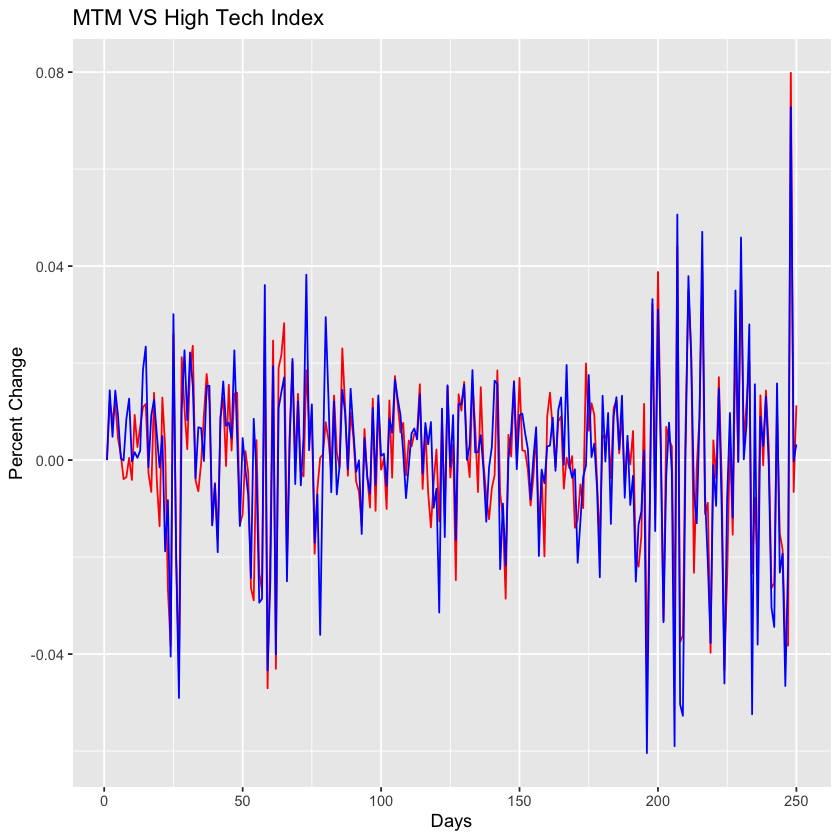

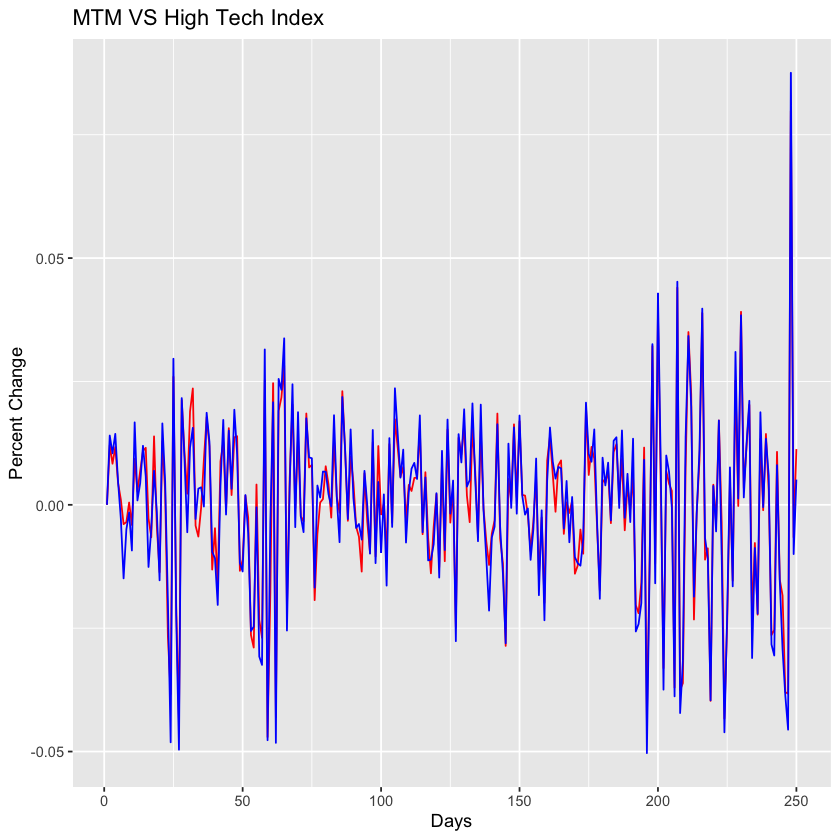

In [27]:
highTechIndexPlot(investingIn5Winners$MTM, stockDF)

makePlot(investingIn5Winners, 5, JPY)

# Analysis: Optimal interval for Reinvesting in 5 Stocks Who Gained the Most

In [14]:
maxMTM <- 0
passingDays <- 0
for (interval in 2:249){
    stockShares=setNames(data.frame(matrix(ncol = 12, nrow = 0)), c('MTM', 'Cash','AAPL','AMZN','FB','GOOG','IBM', 'MSFT', 'NFLX', 'ORCL', 'SAP','TSLA'))
    MTM = 5000000
    to_buy_stocks = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
    day =1
    #Selling the stocks
        stockShares[nrow(stockShares) + 1,] = c(0)
        stockShares[nrow(stockShares),'MTM'] = MTM
        split = MTM/5

        currCash = 0

        #Buying the stocks
       for (stock in to_buy_stocks) {
        shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
        #The number of shares we buy of each stock
        stockShares[nrow(stockShares),stock] =shares  
        currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
       } 
        stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)

    day = day + 1

    while (day<=nrow(stockDF)){
        #calculate dividend
         dividend = dividendPayout(day, to_buy_stocks, stockDF)
        Cash = stockShares[nrow(stockShares),'Cash'] + dividend

        MTM = stockEvaluation(stockShares[nrow(stockShares),3:ncol(stockShares)],select(stockDF,!contains("Adj"))[day,]) + Cash

        if (day%%interval==1){
            to_buy_stocks = percentChanges(day, stockDF, "max", interval)
            stockShares[nrow(stockShares) + 1,] = c(0)
            split = MTM/5
            currCash = 0

            #Buying the stocks
           for (stock in to_buy_stocks) {
            shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
            #The number of shares we buy of each stock
            stockShares[nrow(stockShares),stock] =shares  
            currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
           } 
            stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)
            stockShares[nrow(stockShares),'MTM'] = MTM
        }
        else{  
            stockShares[nrow(stockShares) + 1,] <- stockShares[nrow(stockShares),]
            stockShares[nrow(stockShares),'MTM'] = MTM
            stockShares[nrow(stockShares),'Cash'] = Cash
        }
        day = day + 1
    }
    if (stockShares[nrow(stockShares),'MTM']> maxMTM){
        maxMTM = stockShares[nrow(stockShares),'MTM']
        passingDays <- interval
    } 
}

cat("Optimal interval: ",passingDays,"\n")
cat("Maximum MTM: ",maxMTM,"\n")

Optimal interval:  194 
Maximum MTM:  5858517 


# Analysis: Optimal interval for Reinvesting in 5 Stocks Who Lost the Most

In [15]:
maxMTM <- 0
passingDays <- 0
for (interval in 2:249){
    stockShares=setNames(data.frame(matrix(ncol = 12, nrow = 0)), c('MTM', 'Cash','AAPL','AMZN','FB','GOOG','IBM', 'MSFT', 'NFLX', 'ORCL', 'SAP','TSLA'))
    MTM = 5000000
    to_buy_stocks = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN')
    day =1
    #Selling the stocks
        stockShares[nrow(stockShares) + 1,] = c(0)
        stockShares[nrow(stockShares),'MTM'] = MTM
        split = MTM/5

        currCash = 0

        #Buying the stocks
       for (stock in to_buy_stocks) {
        shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
        #The number of shares we buy of each stock
        stockShares[nrow(stockShares),stock] =shares  
        currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
       } 
        stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)

    day = day + 1

    while (day<=nrow(stockDF)){
        #calculate dividend
         dividend = dividendPayout(day, to_buy_stocks, stockDF)
        Cash = stockShares[nrow(stockShares),'Cash'] + dividend

        MTM = stockEvaluation(stockShares[nrow(stockShares),3:ncol(stockShares)],select(stockDF,!contains("Adj"))[day,]) + Cash

        if (day%%interval==1){
            to_buy_stocks = percentChanges(day, stockDF, "min", interval)
            stockShares[nrow(stockShares) + 1,] = c(0)
            split = MTM/5
            currCash = 0

            #Buying the stocks
           for (stock in to_buy_stocks) {
            shares=(floor(split/stockDF[day,paste(stock,".Close",sep="")]))
            #The number of shares we buy of each stock
            stockShares[nrow(stockShares),stock] =shares  
            currCash = currCash + ((split/stockDF[1,paste(stock,".Close",sep="")] - shares) * stockDF[1,paste(stock,".Close",sep="")])    
           } 
            stockShares[nrow(stockShares),'Cash'] = findCash(stockShares[nrow(stockShares),3:ncol(stockShares)], select(stockDF,!contains("Adj"))[day,],MTM)
            stockShares[nrow(stockShares),'MTM'] = MTM
        }
        else{  
            stockShares[nrow(stockShares) + 1,] <- stockShares[nrow(stockShares),]
            stockShares[nrow(stockShares),'MTM'] = MTM
            stockShares[nrow(stockShares),'Cash'] = Cash
        }
        day = day + 1
    }
    if (stockShares[nrow(stockShares),'MTM']> maxMTM){
        maxMTM = stockShares[nrow(stockShares),'MTM']
        passingDays <- interval
    } 
}

cat("Optimal interval: ",passingDays,"\n")
cat("Maximum MTM: ",maxMTM,"\n")

Optimal interval:  11 
Maximum MTM:  5402263 


In [16]:
Group Members: Aarati Srikumar, George Aboudiwan, Zion Whitewall, Vanshika Shah

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Group Members
          ^
